In [31]:
from sympy import symbols, I, exp, solve, conjugate, simplify, powsimp, Function, dsolve, Mul, Eq, trigsimp
from sympy.physics.quantum import Dagger
from sympy.physics.quantum.boson import BosonOp
from sympy import init_printing
from sympy.physics.quantum.operator import Operator
from sympy.physics.quantum.commutator import Commutator
from sympy.physics.quantum.operatorordering import normal_ordered_form
from symbosonkit import (similarity_transform, collect_terms, drop_terms_containing, drop_c_number_terms, 
                         hamiltonian_transformation, OperatorFunction, coeff_of, _normal, expand_terms,
                         reorder_add, _split_comm_noncomm, drop_terms_matching)
from IPython.display import display
import sympy as sp

init_printing(order='none')

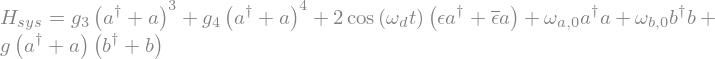

In [32]:
a = BosonOp('a')
adag = Dagger(a)
b = BosonOp('b')
bdag = Dagger(b)

wa_0, wb_0, g3, g4, g, wr, wd, t, lmbda_sym = symbols('\\omega_{a\\,0} \\omega_{b\\,0} g3 g4 g \\omega_r \\omega_d t \\lambda', real=True)
delta = symbols('\\Delta', real=True, positive=True)
eps = symbols('\\epsilon', complex=True)
zeta = Function('\\zeta', complex=True)
zeta_t = zeta(t)

H = wa_0 * adag * a + g3 * (adag + a)**3 + g4 * (adag + a)**4 \
    + (Dagger(eps)*a + eps*adag) * 2*sp.re(exp(I * wd * t)) \
    + g * (adag + a) * (bdag + b) + wb_0 * bdag * b

Hsys = symbols('H_{sys}')
display(Eq(Hsys,H))
display(Eq(delta, wa_0 - wb_0))

### Beam-splitter transformation

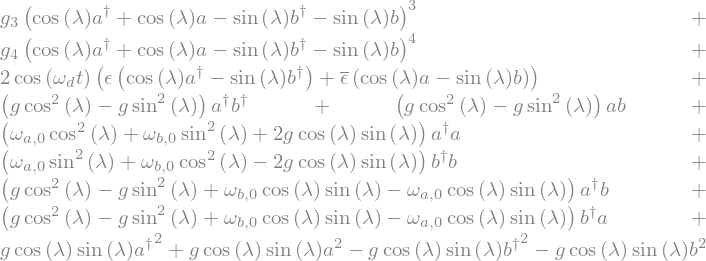

In [33]:
Ubs = exp((lmbda_sym) * (adag * b - bdag * a))
display(Eq(symbols('U_{BS}'), Ubs))

display(Eq(symbols('U_{BS}aU_{BS}^\\dag'), similarity_transform(Ubs.exp, a)))
display(Eq(symbols('U_{BS}bU_{BS}^\\dag'), similarity_transform(Ubs.exp, b)))


H_transformed = hamiltonian_transformation(H, Ubs, expand=False)

H_transformed = collect_terms(normal_ordered_form(expand_terms(H_transformed, [eps, wa_0, wb_0, g], commutator=True), independent=True), [g3, g4, adag*a, a, adag, adag*b, bdag*a, adag*bdag, a*b, bdag*b, bdag, b])

H_transformed = powsimp(H_transformed)
H_transformed

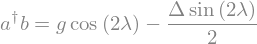

Solve for lambda


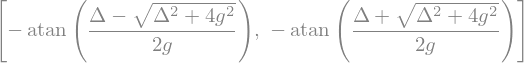

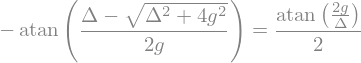

In [34]:
adag_b_coeff = collect_terms(trigsimp(coeff_of(collect_terms(H_transformed, [adag*b, bdag*a]), adag*b)), [sp.sin(2*lmbda_sym)]).subs({(wa_0-wb_0)/2: delta/2})
display(Eq(symbols('a^{\\dag}b'), adag_b_coeff))

print('Solve for lambda')
lmbda_sol = solve(adag_b_coeff, lmbda_sym)
display(lmbda_sol)
display(Eq(lmbda_sol[0], sp.atan(2*g/delta)/2))

lmbda = sp.atan(2*g/delta)/2
display(Eq(symbols('a^{\\dag}b'), adag_b_coeff.subs(lmbda_sym, lmbda)))

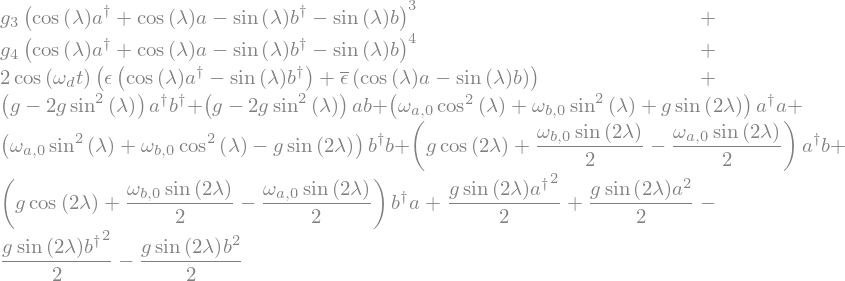

In [35]:
H_transformed = collect_terms(H_transformed, [adag*b, bdag*a, adag*bdag, a*b, bdag*b, bdag, b])
H_transformed = trigsimp(H_transformed)

H_transformed

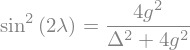

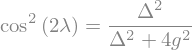

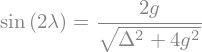

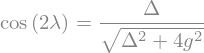

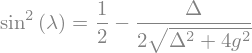

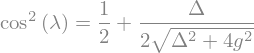

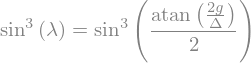

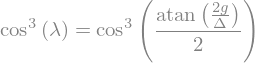

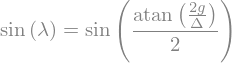

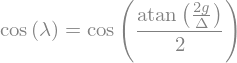

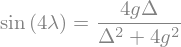

In [36]:
display(Eq(sp.sin(2*lmbda_sym)**2, trigsimp(sp.sin(2*lmbda)**2).simplify()))
display(Eq(sp.cos(2*lmbda_sym)**2, trigsimp(sp.cos(2*lmbda)**2).simplify()))
display(Eq(sp.sin(2*lmbda_sym), trigsimp(sp.sin(2*lmbda)).simplify()))
display(Eq(sp.cos(2*lmbda_sym), trigsimp(sp.cos(2*lmbda)).simplify()))
display(Eq(sp.sin(lmbda_sym)**2, trigsimp(sp.sin(lmbda)**2).simplify()))
display(Eq(sp.cos(lmbda_sym)**2, trigsimp(sp.cos(lmbda)**2).simplify()))
display(Eq(sp.sin(lmbda_sym)**3, trigsimp(sp.sin(lmbda)**3).simplify()))
display(Eq(sp.cos(lmbda_sym)**3, trigsimp(sp.cos(lmbda)**3).simplify()))
display(Eq(sp.sin(lmbda_sym), trigsimp(sp.sin(lmbda)).simplify()))
display(Eq(sp.cos(lmbda_sym), trigsimp(sp.cos(lmbda)).simplify()))
display(Eq(sp.sin(4*lmbda_sym), trigsimp(sp.sin(4*lmbda)).simplify()))

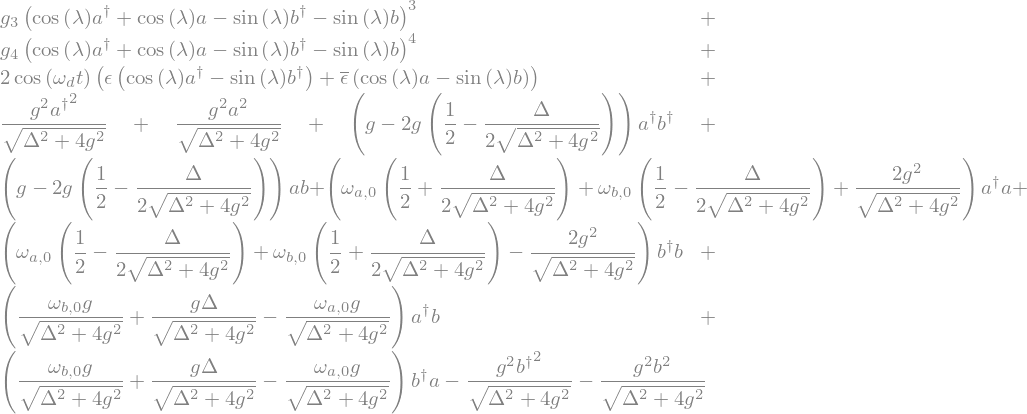

In [37]:
# Replace the trig functions with their simplified versions
H_transformed = H_transformed.subs({
    sp.sin(2*lmbda_sym)**2: trigsimp(sp.sin(2*lmbda)**2).simplify(),
    sp.cos(2*lmbda_sym)**2: trigsimp(sp.cos(2*lmbda)**2).simplify(),
    sp.sin(2*lmbda_sym): trigsimp(sp.sin(2*lmbda)).simplify(),
    sp.cos(2*lmbda_sym): trigsimp(sp.cos(2*lmbda)).simplify(),
    sp.sin(lmbda_sym)**2: trigsimp(sp.sin(lmbda)**2).simplify(),
    sp.cos(lmbda_sym)**2: trigsimp(sp.cos(lmbda)**2).simplify(),
    sp.sin(lmbda_sym)**3: trigsimp(sp.sin(lmbda)**3).simplify(),
    sp.cos(lmbda_sym)**3: trigsimp(sp.cos(lmbda)**3).simplify(),
    sp.sin(4*lmbda_sym): trigsimp(sp.sin(4*lmbda)).simplify()
})
H_transformed


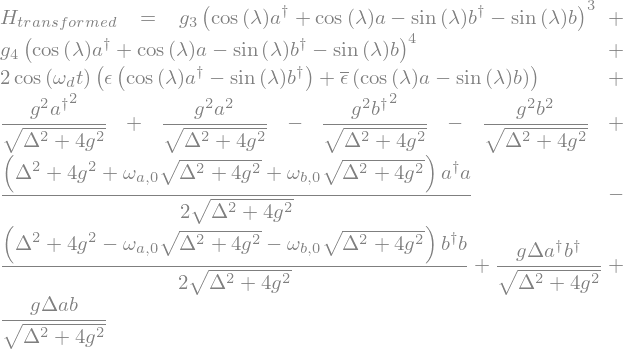

In [38]:
H_transformed = H_transformed.factor(deep=True).subs({
    -wa_0 + wb_0: -delta,
    delta*wa_0 - delta*wb_0: delta**2
})

display(Eq(symbols('H_{transformed}'), H_transformed))

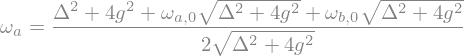

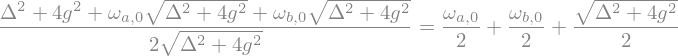

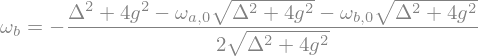

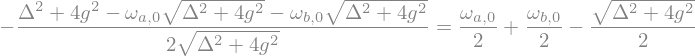

In [39]:
wa_sym, wb_sym = symbols('\\omega_a \\omega_b', real=True)

wa = coeff_of(H_transformed, adag*a)
display(Eq(wa_sym, wa))
display(Eq(wa, wa.simplify().subs({delta**2/(2*sp.sqrt(delta**2 + 4*g**2)) + 2*g**2/sp.sqrt(delta**2 + 4*g**2): sp.sqrt(delta**2 + 4*g**2)/2})))
wb = coeff_of(H_transformed, bdag*b)
display(Eq(wb_sym, wb))
display(Eq(wb, wb.simplify().subs({-delta**2/(2*sp.sqrt(delta**2 + 4*g**2)) - 2*g**2/sp.sqrt(delta**2 + 4*g**2): -sp.sqrt(delta**2 + 4*g**2)/2})))

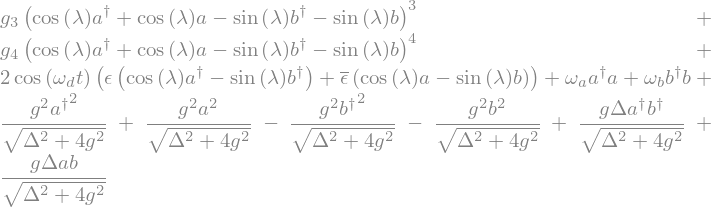

In [40]:
H_transformed = H_transformed.subs({
    wa: wa_sym,
    wb: wb_sym,
})
H_transformed

### So far, dealt with an *exact* solution. Make the approximation $\Delta >> g$. So $\lambda = \frac{1}{2} \arctan(\frac{2g}{\Delta}) \approx \frac{g}{\Delta}$. And $\sin(\lambda) \approx \frac{g}{\Delta}$, $\cos(\lambda) \approx 1$
 <!-- - \frac{g^2}{2 \Delta^2}$ -->

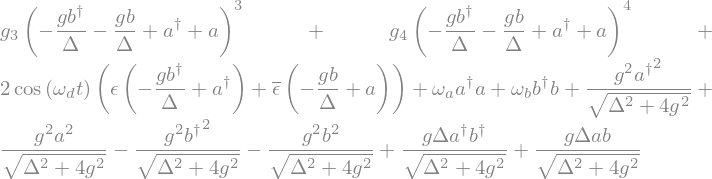

In [41]:
H_transformed = H_transformed.subs({
    sp.sin(lmbda_sym): g/delta,
    sp.cos(lmbda_sym): 1
})

H_transformed = powsimp(collect_terms(normal_ordered_form(expand_terms(H_transformed, [eps], commutator=True), independent=True), [g3, g4, adag*a, a, adag]))
H_transformed

### Displace and rotate

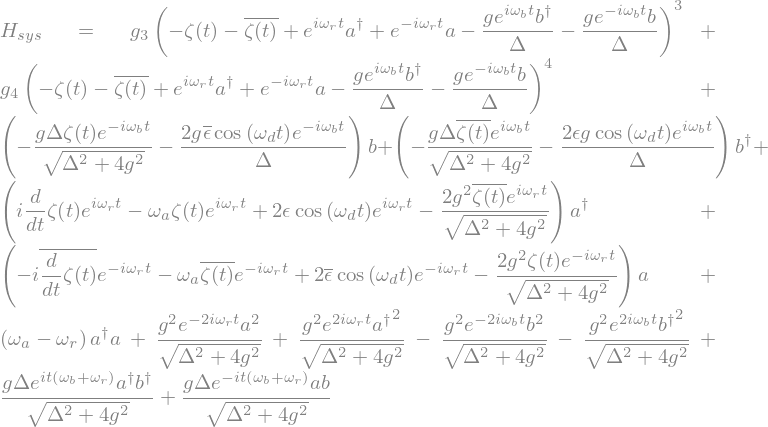

In [42]:
R = exp(I * wr * adag * a * t + I * wb_sym * bdag * b * t)
D = exp(zeta_t * adag - conjugate(zeta_t) * a)

H_DR = hamiltonian_transformation(H_transformed, D)
H_DR = hamiltonian_transformation(H_DR, R)

H_DR = powsimp(drop_c_number_terms(collect_terms(normal_ordered_form(expand_terms(H_DR, [wa_sym, wb_sym, g, g**2, 
                                                                                         (eps*exp(I * wd *t) + eps*exp(-I *wd *t)),
                                                                                         (-eps*exp(I * wd *t) - eps*exp(-I *wd *t)), I,
                                                                                         sp.cos(wd * t)], commutator=True), 
                                                                                         independent=True), 
                                                                                         [g3, g4, adag*a, a, adag, adag*b, bdag*a, 
                                                                                          adag*bdag, a*b, bdag*b, bdag, b])))

display(Eq(Hsys, H_DR))

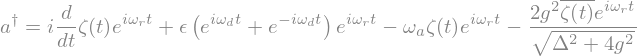

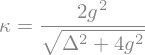

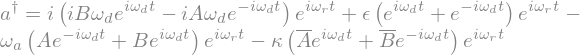

In [43]:
adag_coeff = coeff_of(H_DR, adag).subs(2*sp.cos(wd * t), (exp(I * wd * t) + exp(-I * wd * t)))
display(Eq(symbols('a^{\\dag}'), adag_coeff))

# Make anatz for zeta(t) A exp(I * wd * t) + B exp(-I * wd * t)
A, B = symbols('A B', complex=True)
kappa = symbols('\\kappa', real=True, positive=True)
zeta_t_anatz = A * exp(-I * wd * t) + B * exp(I * wd * t)
display(Eq(zeta_t, zeta_t_anatz))

adag_coeff = adag_coeff.subs({zeta_t: zeta_t_anatz,
                              2*g**2/sp.sqrt(delta**2 + 4*g**2): kappa}).doit()
display(Eq(kappa, 2*g**2/sp.sqrt(delta**2 + 4*g**2)))
display(Eq(symbols('a^{\\dag}'), adag_coeff))


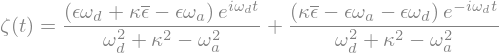

In [44]:
# --- write the ODE  ẋ = -iωa ζ - iκ ζ̄ - iε(e^{-iωd t}+e^{iωd t}) -------------
ode_expr = adag_coeff

# --- collect the two harmonics  e^{±iωd t}  and set them to zero -------------
coeff_p = sp.expand(ode_expr).coeff(sp.exp( sp.I*wd*t))  # +ωd term
coeff_m = sp.expand(ode_expr).coeff(sp.exp(-sp.I*wd*t))  # -ωd term

# solve the 2×2 linear system for A and B
A_sol, B_sol = sp.solve((sp.Eq(coeff_p, 0), sp.Eq(coeff_m, 0)), (A, B))[0]

# --- periodic steady‑state ζ_ss(t) ------------------------------------------
ss_zeta_t = A_sol*sp.exp(-sp.I*wd*t) + B_sol*sp.exp(sp.I*wd*t)

display(Eq(zeta_t, ss_zeta_t))

<!-- #### Dropping terms assuming they're fast rotating, or of $O(g^2/\Delta)$: $- \frac{2 g^{2} e^{i \omega_{r} t} \overline{\zeta{\left(t \right)}}}{\sqrt{\Delta^{2} + 4 g^{2}}}$ -->
 <!-- - \frac{0.5 \epsilon g^{2} e^{i t \left(- \omega_{d} + \omega_{r}\right)}}{\Delta^{2}} - \frac{0.5 \epsilon g^{2} e^{i t \left(\omega_{d} + \omega_{r}\right)}}{\Delta^{2}}$ -->

In [45]:
# adag_coeff = drop_terms_containing(coeff_of(H_DR, adag), [g**2])
# display(Eq(symbols('a^{\\dag}'), adag_coeff))

# a_coeff = drop_terms_containing(coeff_of(H_DR, a), [g**2])
# display(Eq(symbols('a'), a_coeff))

In [46]:
# ss_zeta_t = dsolve(adag_coeff, zeta_t).rhs # steady state solution for zeta(t), keep specific solution
# ss_zeta_t = drop_terms_containing(ss_zeta_t, [exp(I * wa_sym * t), exp(-I * wa_sym * t)]) # drop terms that contain time dependence
# display(Eq(zeta_t, ss_zeta_t))
# display(Eq(zeta_t + Dagger(zeta_t), collect_terms(ss_zeta_t + Dagger(ss_zeta_t), [exp(I * wd * t), exp(-I * wd * t)])))

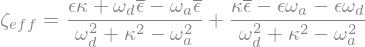

In [47]:
zeta_eff = coeff_of(collect_terms(ss_zeta_t + Dagger(ss_zeta_t), [exp(I * wd * t), exp(-I * wd * t)]), exp(-I * wd * t))
zeta_eff_sym = symbols('\\zeta_{eff}', complex=True)
Eq(zeta_eff_sym, zeta_eff)

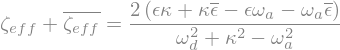

In [48]:
display(Eq(zeta_eff_sym + Dagger(zeta_eff_sym), (zeta_eff + conjugate(zeta_eff)).simplify()))

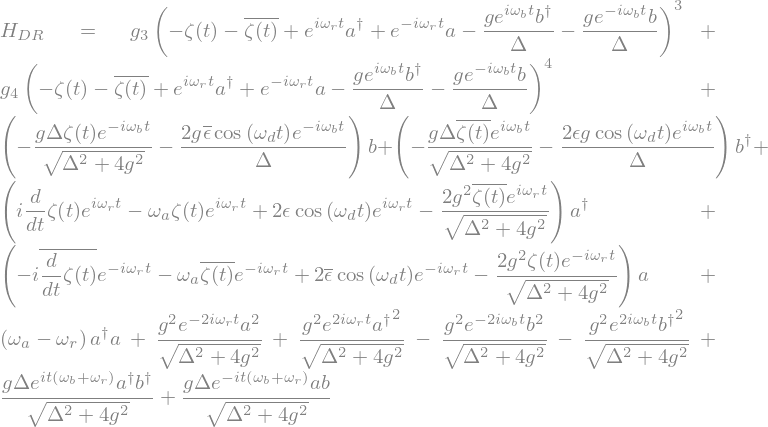

In [49]:
display(Eq(symbols('H_{DR}'), H_DR))

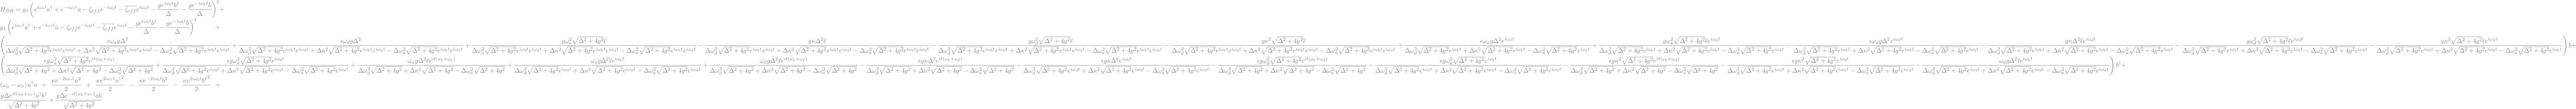

In [50]:
ss_zeta_t = ss_zeta_t.subs({
    kappa/2: g**2/sp.sqrt(delta**2 + 4*g**2),
})

H_DR_transformed = H_DR.subs({
    zeta_t + Dagger(zeta_t): zeta_eff_sym*exp(-I * wd * t) + Dagger(zeta_eff_sym)*exp(I * wd * t),
    2*sp.cos(wd * t): (exp(I * wd * t) + exp(-I * wd * t)),
}).subs({
    zeta_t: ss_zeta_t,
})

H_DR_transformed = H_DR_transformed.subs({
    g**2/sp.sqrt(delta**2 + 4*g**2): kappa/2,
})


H_DR_transformed = drop_c_number_terms(powsimp(collect_terms(normal_ordered_form(expand_terms(H_DR_transformed, [adag, a, bdag, b, adag*a], doit=True), independent=True), [g3, g4, adag*a, a, adag, adag*b, bdag*a, adag*bdag, a*b, bdag*b, bdag, b])))
H_DR_transformed = drop_c_number_terms(powsimp(collect_terms(normal_ordered_form(expand_terms(H_DR_transformed, [adag, a, bdag, b, adag*a]).factor(), independent=True), [g3, g4, adag*a, a, adag, adag*b, bdag*a, adag*bdag, a*b, bdag*b, bdag, b])))

display(Eq(symbols('H_{DR}'), H_DR_transformed))

In [51]:
adag_coeff_transformed = coeff_of(H_DR_transformed, adag).doit().factor()
display(Eq(symbols('a^{\\dag}'), adag_coeff_transformed))
a_coeff_transformed = coeff_of(H_DR_transformed, a).doit().factor()
display(Eq(symbols('a'), a_coeff_transformed))

# Save the g^2 terms
# adag_g2 = coeff_of(adag_coeff_transformed, g**2) * g**2
# a_g2 = coeff_of(a_coeff_transformed, g**2) * g**2
# display(Eq(symbols('a^{\\dag}_{g^2}'), adag_g2))
# display(Eq(symbols('a_{g^2}'), a_g2))

# # Remove the g^2 terms from the coefficients
# adag_coeff_transformed = drop_terms_containing(adag_coeff_transformed, [g**2])
# a_coeff_transformed = drop_terms_containing(a_coeff_transformed, [g**2])
# display(Eq(symbols('a^{\\dag}'), adag_coeff_transformed))
# display(Eq(symbols('a'), a_coeff_transformed))

# # Factor the coefficients
# adag_coeff_transformed = adag_coeff_transformed.factor()
# a_coeff_transformed = a_coeff_transformed.factor()
# display(Eq(symbols('a^{\\dag}'), adag_coeff_transformed))
# display(Eq(symbols('a'), a_coeff_transformed.expand()))

#### Drop all terms that are just $c*\omega_d$, they're only slowly varying if $\omega_d=0$. As well as pther fast rotating terms

In [52]:
# terms = []
# for term in H_DR_transformed.args:
#     args = []
#     for arg in term.args:
#         arg = drop_terms_containing(arg, [exp(I * wd * t), exp(-I * wd * t), 
#                                           exp(I * 2*wd * t), exp(-I * 2*wd * t),
#                                           exp(I * 3*wd * t), exp(-I * 3*wd * t),
#                                           exp(I * 4*wd * t), exp(-I * 4*wd * t),
#                                           exp(I * (wb_sym + wr) * t), exp(-I * (wb_sym + wr) * t),
#                                           exp(I * wb_sym * t), exp(-I * wb_sym * t),
#                                           exp(I * wr * t), exp(-I * wr * t),
#                                           exp(I * 2*wb_sym * t), exp(-I * 2*wb_sym * t),
#                                           exp(I * 2*wr * t), exp(-I * 2*wr * t),
#                                           exp(I * (wb_sym + wd) * t), exp(-I * (wb_sym + wd) * t),
#                                           exp(I * (wd + wr) * t), exp(-I * (wd + wr) * t),],
#                                           deep=True)
#         args.append(arg)
#     terms.append(Mul(*args))

# H_DR_transformed = sum(terms)
# display(Eq(symbols('H_{DR}'), H_DR_transformed))


In [53]:
# H_final = drop_terms_containing(H_DR_transformed, [bdag, a, b]) + (wa_sym - wr) * adag*a
# display(Eq(symbols('H_{final}'), H_final))


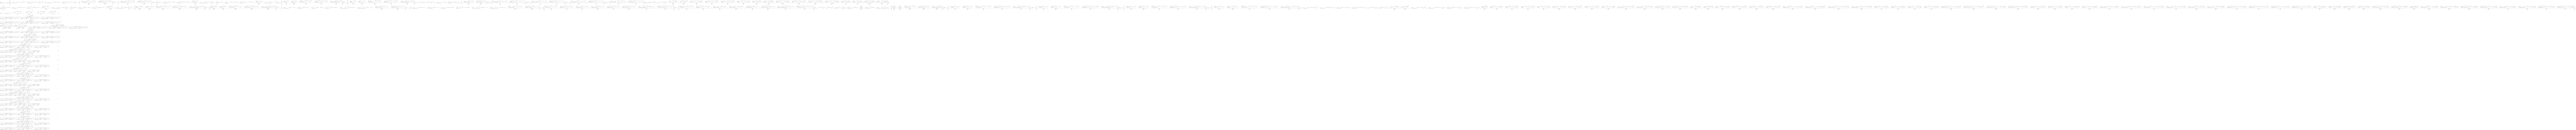

In [54]:
H_final = H_DR_transformed
H_final = powsimp(collect_terms(drop_c_number_terms(normal_ordered_form(H_final.expand(), independent=True)), [g3, g4, adag*a]))
# display(Eq(symbols('H_{final}'), H_final))

g3_coeff = coeff_of(H_final, g3)
g3_coeff = collect_terms(g3_coeff, [adag*a, a, adag, adag*b, bdag*a, adag*bdag, a*b, bdag*b, bdag, b, adag**2, a**2, bdag**2, b**2])
# display(Eq(symbols('g3_{coeff}'), g3_coeff))

g4_coeff = coeff_of(H_final, g4)
g4_coeff = collect_terms(g4_coeff, [adag*a, a, adag, adag*b, bdag*a, adag*bdag, a*b, bdag*b, bdag, b, adag**2, a**2, bdag**2, b**2])
# display(Eq(symbols('g4_{coeff}'), g4_coeff))

H_final = drop_terms_containing(H_final, [g3, g4]) + g3 * g3_coeff + g4 * g4_coeff
display(Eq(symbols('H_{final}'), H_final))

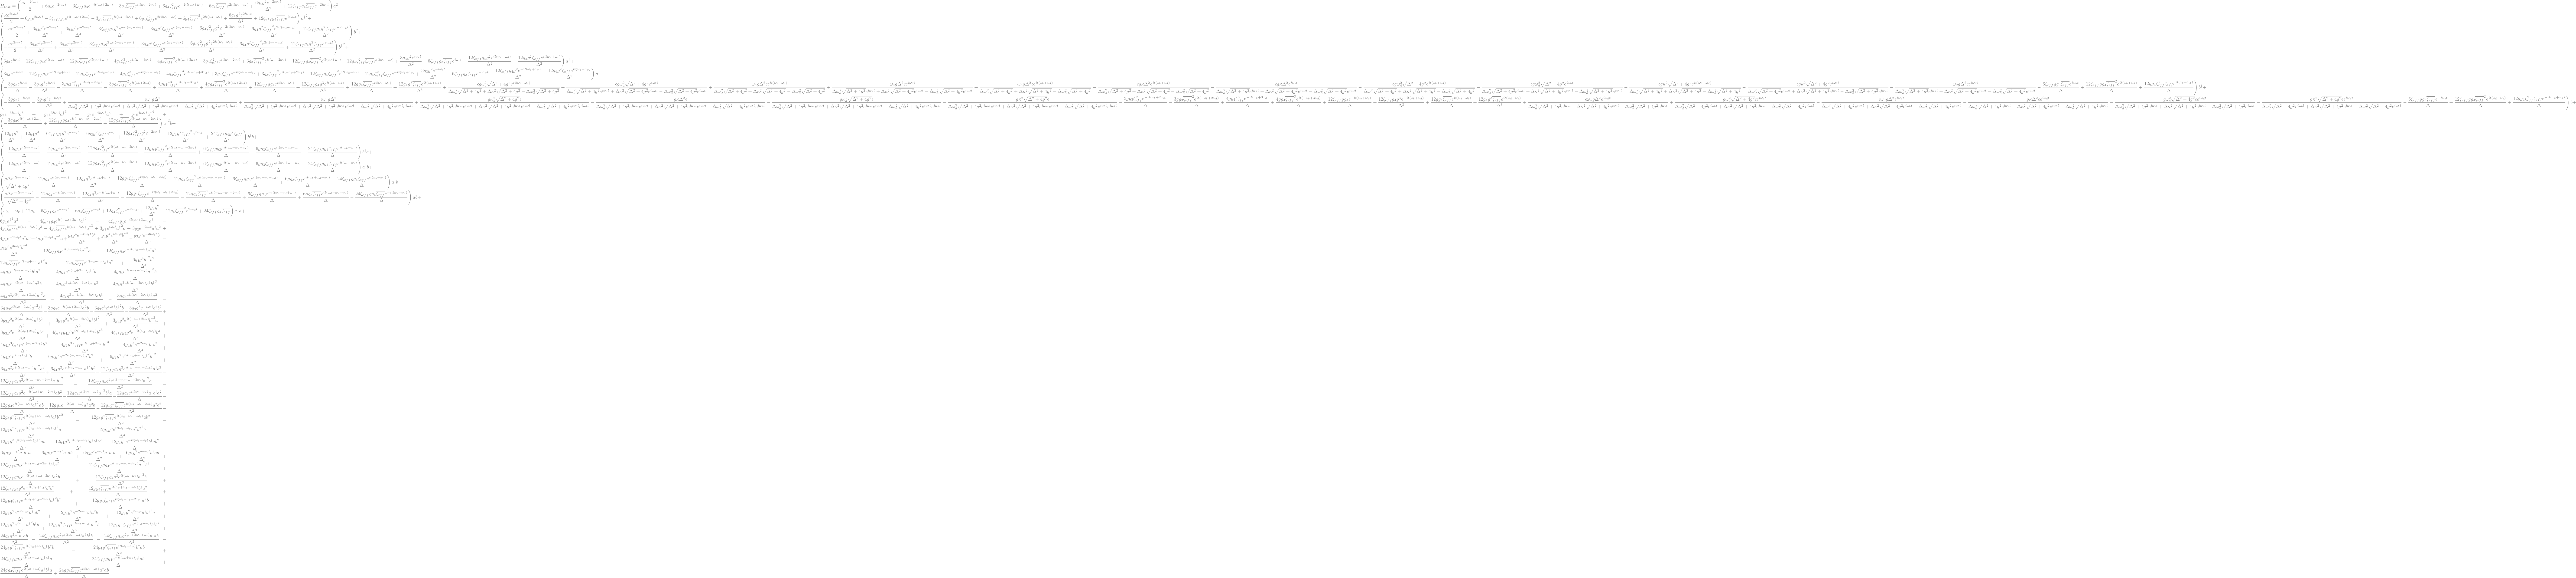

In [59]:
H_test = powsimp(collect_terms(H_final.expand(), [adag*a, a, adag, adag*b, bdag*a, adag*bdag, a*b, bdag*b, bdag, b, adag**2, a**2, bdag**2, b**2, adag**2*b, a**2*bdag, adag**3*b, a**3*bdag]))
display(Eq(symbols('H_{test}'), H_test))

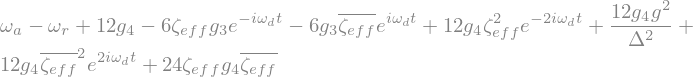

In [60]:
coeff_of(H_test, adag*a)

#### Note that all the crazy terms (e.g. $- \frac{\Delta^{2} \epsilon \kappa g e^{i \omega_{b} t} {{b}^\dagger}}{\Delta \kappa^{2} \sqrt{\Delta^{2} + 4 g^{2}} e^{i \omega_{d} t} - \Delta \omega_{a}^{2} \sqrt{\Delta^{2} + 4 g^{2}} e^{i \omega_{d} t} + \Delta \omega_{d}^{2} \sqrt{\Delta^{2} + 4 g^{2}} e^{i \omega_{d} t}}$) will get dropped by RWA

Define $K = -6 g_4$, and $\epsilon_2 = -3 \zeta_{eff} g_3$

Let $\omega_r = \omega_a + 12 g_4 + 24 g_4 |\zeta_{eff}|^2 = \omega_a - 4 |\zeta_{eff}|^2 K - 2K$ do drop the $a^\dag a$ detuning, and consider the 2 regiemes under RWA:

In [61]:
eps2_sym = symbols('\\epsilon_2', complex=True)
K_sym = symbols('K', real=True)

eps2 = -3*zeta_eff_sym*g3
K = -6*g4

wr_disp = wa_sym  - 4*sp.Abs(zeta_eff_sym)**2*K - 2*K

### Case 1 - Kerr Hamiltonian with 2-photon exchange (${a^\dag}^2 b + a^2 b^\dag$)
Let $\omega_d=2 \omega_r$ and drop all fast rotating terms

In [62]:
def seperate_terms(expr, terms: dict):
    """A function to separate terms in an expression based on a dictionary of terms.
    Assumes terms are commutative"""
    # Put all g/delta terms in parantheses
    
    args = []
    for arg in expr.args:
        comm, noncomm = _split_comm_noncomm(arg)

        if comm.is_Add:
            comm = seperate_terms(comm, terms)

        
        for term in terms.keys():
            coeff = comm.coeff(term)
            if coeff:
                comm = coeff * terms[term]

        args.append(comm * noncomm)
    
    return sum(args)

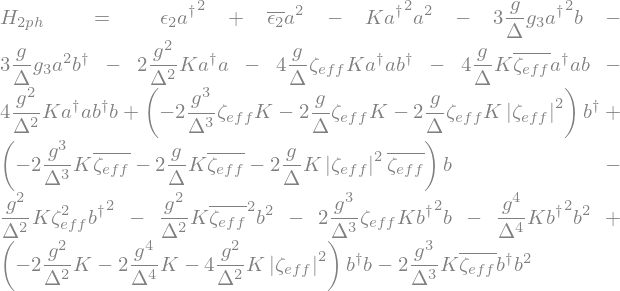

In [75]:
H_2ph = H_final.subs({wr: wr_disp}).subs(wd, 2*wr_disp).subs(wb_sym, 2*wr_disp)
H_2ph = drop_terms_containing(powsimp(H_2ph.expand()), [exp(I * x*wd * t) for x in range(-2, 3)] + \
                               [exp(I * x*wa_sym * t) for x in range(-12, 13)] + [eps, Dagger(eps)] + \
                                [exp(I * x*wr_disp * t) for x in range(-8, 9)],
                                        deep=True)
H_2ph = powsimp(collect_terms(drop_c_number_terms(normal_ordered_form(H_2ph.expand())), [adag*a, adag**2 * a**2, adag**2, a**2, adag*b, 
                                                                                         bdag*b, bdag*a, b, bdag, bdag**2, b**2])).subs({
                                                                                             zeta_eff_sym * sp.conjugate(zeta_eff_sym): sp.Abs(zeta_eff_sym)**2,
                                                                                             -3*zeta_eff_sym*g3: eps2_sym,
                                                                                             -3*sp.conjugate(zeta_eff_sym)*g3: sp.conjugate(eps2_sym),
                                                                                             6*g4: -K_sym,
                                                                                             24*g4: -4*K_sym,
                                                                                             12*g4: -2*K_sym,
                                                                                         })

g_deltas = {g/delta: symbols('\\frac{g}{\\Delta}'), g**2/delta**2: symbols('\\frac{g^2}{\\Delta^2}'),
                g**3/delta**3: symbols('\\frac{g^3}{\\Delta^3}'), g**4/delta**4: symbols('\\frac{g^4}{\\Delta^4}')}

H_2ph = seperate_terms(H_2ph, g_deltas)
H_2ph = reorder_add(H_2ph, mode_order=[a, b])

display(Eq(symbols('H_{2ph}'), H_2ph))

#### Dropping all $O(g^2/\Delta^2)$:

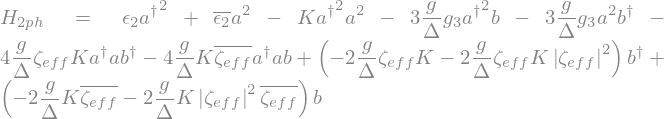

In [76]:
H_2ph = reorder_add(powsimp(collect_terms(drop_terms_containing(H_2ph.expand(), [g**2/delta**2, g**3/delta**3, g**4/delta**4] + [g_deltas[x] for x in g_deltas.keys() if x != g/delta]), [adag*a, adag**2 * a**2, adag**2, a**2, adag*b, bdag*b, bdag*a, b, bdag, bdag**2, b**2])), [])
display(Eq(symbols('H_{2ph}'), H_2ph))

### Case 2 - Kerr Hamiltonian 3-photon exchange (${a^\dag}^3 b + a^3 b^\dag$)

Let $\omega_b = 3 \omega_r$

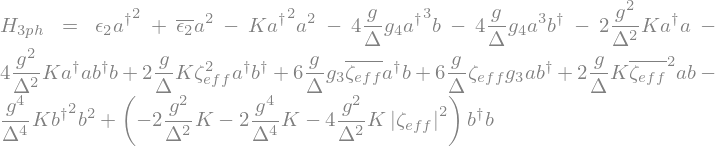

In [84]:
H_3ph = H_final.subs({wr: wr_disp}).subs(wd, 2*wr_disp).subs(wb_sym, 3*wr_disp)
H_3ph = drop_terms_containing(powsimp(H_3ph.expand()), [exp(I * x*wd * t) for x in range(-2, 3)] + \
                               [exp(I * x*wa_sym * t) for x in range(-12, 13)] + [eps, Dagger(eps)] + \
                                [exp(I * x*wr_disp * t) for x in range(-12, 13)],
                                        deep=True)
H_3ph = powsimp(collect_terms(drop_c_number_terms(normal_ordered_form(H_3ph.expand())), 
                              [adag*a, adag**2 * a**2, adag**2, a**2, adag*b, bdag*b, bdag*a, b, bdag, bdag**2, b**2])).subs({
                                                                                             zeta_eff_sym * sp.conjugate(zeta_eff_sym): sp.Abs(zeta_eff_sym)**2,
                                                                                             -3*zeta_eff_sym*g3: eps2_sym,
                                                                                             -3*sp.conjugate(zeta_eff_sym)*g3: sp.conjugate(eps2_sym),
                                                                                             6*g4: -K_sym,
                                                                                             24*g4: -4*K_sym,
                                                                                             12*g4: -2*K_sym,
                                                                                         })
H_3ph = seperate_terms(H_3ph, g_deltas)
H_3ph = reorder_add(H_3ph, mode_order=[a, b])
display(Eq(symbols('H_{3ph}'), H_3ph))

#### Dropping all $O(g^2/\Delta^2)$:

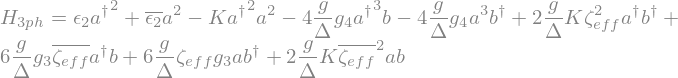

In [83]:
H_3ph = reorder_add(powsimp(collect_terms(drop_terms_containing(H_3ph.expand(), [g**2/delta**2, g**3/delta**3, g**4/delta**4] + [g_deltas[x] for x in g_deltas.keys() if x != g/delta]), [adag*a, adag**2 * a**2, adag**2, a**2, adag*b, bdag*b, bdag*a, b, bdag, bdag**2, b**2])), [])
display(Eq(symbols('H_{3ph}'), H_3ph))